In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report as cr

In [3]:
df_ = pd.read_csv("/content/drive/MyDrive/AI/possum.csv")

In [4]:
df_.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
df = df_.drop(labels=["case", "site", "Pop"], axis=1)

In [24]:
print(df.shape)

(104, 11)


In [29]:
#convert data to x and y
df_x1 = df.drop(labels=["sex"] , axis=1)
df_y = df["sex"]
df_y = df_y[:-3]

In [30]:
df_x = df_x1.dropna()

In [33]:
print(df_x.shape)

(101, 10)


In [34]:
df_nans_fill = df_x.fillna(df_x.mean())

In [35]:
print(df_nans_fill.shape)

(101, 10)


In [36]:
labels = np.array([df_y]).reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_y = one_hot_encoder.fit_transform(labels)
encoded_y = encoded_y.argmax(axis=1)

In [37]:
print(encoded_y)

[1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [38]:
scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_nans_fill)
y = encoded_y.flatten()

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_nrm , y , train_size=0.8)

In [41]:
y_train_ctg = to_categorical(y_train)
y_test_ctg  = to_categorical(y_test)

In [48]:
model = Sequential()
model.add(Dense(64 , activation="relu" , input_shape=x_train.shape[1:]))
model.add(Dense(32 , activation="relu"))
model.add(Dense(1 , activation="sigmoid"))
model.compile(optimizer="adam" , loss="binary_crossentropy")
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
results = model.fit(x_train , y_train , epochs=20 , validation_data=(x_test,y_test))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7033 - val_loss: 0.7415
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6893 - val_loss: 0.7285
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6669 - val_loss: 0.7183
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6582 - val_loss: 0.7088
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6388 - val_loss: 0.7020
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6327 - val_loss: 0.6951
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6243 - val_loss: 0.6890
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6077 - val_loss: 0.6847
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6093 - val_loss: 0.6797
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5950 - val_loss: 0.6766
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5900 - val_loss: 0.6726
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5802 - val_loss: 0.6705
E

In [51]:
yhat_train = model.predict(x_train).round()
yhat_test  = model.predict(x_test).round()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


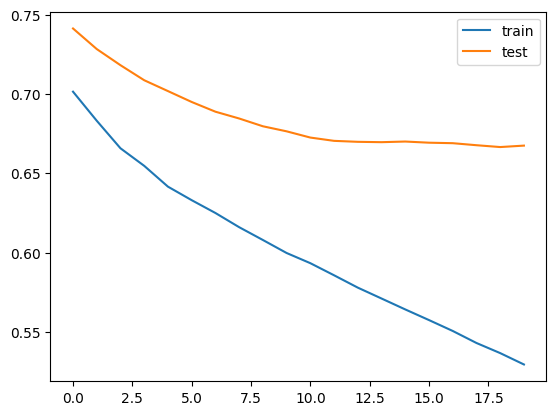

In [53]:
plt.plot(results.history["loss"] , label="train")
plt.plot(results.history["val_loss"] , label="test")
plt.legend()